# Step 1: Average per capita GDP per state

**_find the coordinates for each city so we can visualize how far these cities are from each other (hint: it is far)_**

In [1]:
import numpy as np # this handles data in a vectorized manner

import pandas as pd # for data analysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # this will handle the JSON files

!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim 

import requests
from pandas.io.json import json_normalize

import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes
import folium

!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer

!python -m yellowbrick.download --cleanup

print('Libraries have been imported!')

WARNING conda.base.context:use_only_tar_bz2(632): Conda is constrained to only using the old .tar.bz2 file format because you have conda-build installed, and it is <3.18.3.  Update or remove conda-build to get smaller downloads and faster extractions.
Solving environment: done

# All requested packages already installed.

WARNING conda.base.context:use_only_tar_bz2(632): Conda is constrained to only using the old .tar.bz2 file format because you have conda-build installed, and it is <3.18.3.  Update or remove conda-build to get smaller downloads and faster extractions.
Solving environment: done

# All requested packages already installed.

Downloaded datasets to /Users/morgankaiser/data
Libraries have been imported!


In [2]:
GDP_df = pd.read_csv('GDP_data.csv')
GDP_df.head() # see how table looks

,id,name,type,year,variable,value
0,0400000US01,Alabama State,state,1997,per_capita_gdp,32887.0
1,0400000US01,Alabama State,state,1998,per_capita_gdp,33736.0
2,0400000US01,Alabama State,state,1999,per_capita_gdp,34783.0
3,0400000US01,Alabama State,state,2000,per_capita_gdp,35165.0
4,0400000US01,Alabama State,state,2001,per_capita_gdp,35008.0


In [3]:
# let's see how many cols and rows are in the dataset.
GDP_df.shape

(15164, 6)

In [4]:
# okay, we don't need a majority of those rows. narrow this down to the 3 states we are targeting.

# locate the column (i.e. name) that only contains rows for California (i.e. 'California State')
# narrow this down by only grabbing the 'per_capita_gdp' under the variable column.
# we do NOT want the per_capita_gdp percent change. we are finding the average on our own.

select_CA = GDP_df.loc[(GDP_df.name == 'California State')&(GDP_df.variable == 'per_capita_gdp')]
select_CA

,id,name,type,year,variable,value
84,0400000US06,California State,state,1997,per_capita_gdp,42438.0
85,0400000US06,California State,state,1998,per_capita_gdp,44574.0
86,0400000US06,California State,state,1999,per_capita_gdp,47236.0
87,0400000US06,California State,state,2000,per_capita_gdp,50310.0
88,0400000US06,California State,state,2001,per_capita_gdp,49385.0
89,0400000US06,California State,state,2002,per_capita_gdp,50002.0
90,0400000US06,California State,state,2003,per_capita_gdp,51780.0
91,0400000US06,California State,state,2004,per_capita_gdp,53474.0
92,0400000US06,California State,state,2005,per_capita_gdp,55547.0
93,0400000US06,California State,state,2006,per_capita_gdp,57527.0


In [5]:
# locate the column (i.e. name) that only contains rows for Massachusetts (i.e. 'Massachusetts State')
# narrow this down further by only grabbing the 'per_capita_gdp' value.
# we do NOT want the per_capita_gdp percent change. we are finding the average on our own.

select_MA = GDP_df.loc[(GDP_df.name == 'Massachusetts State')&(GDP_df.variable == 'per_capita_gdp')]
select_MA

,id,name,type,year,variable,value
441,0400000US25,Massachusetts State,state,1997,per_capita_gdp,48635.0
442,0400000US25,Massachusetts State,state,1998,per_capita_gdp,50205.0
443,0400000US25,Massachusetts State,state,1999,per_capita_gdp,52507.0
444,0400000US25,Massachusetts State,state,2000,per_capita_gdp,56519.0
445,0400000US25,Massachusetts State,state,2001,per_capita_gdp,56651.0
446,0400000US25,Massachusetts State,state,2002,per_capita_gdp,56847.0
447,0400000US25,Massachusetts State,state,2003,per_capita_gdp,58203.0
448,0400000US25,Massachusetts State,state,2004,per_capita_gdp,59805.0
449,0400000US25,Massachusetts State,state,2005,per_capita_gdp,61030.0
450,0400000US25,Massachusetts State,state,2006,per_capita_gdp,62050.0


In [6]:
# locate the column (i.e. name) that only contains rows for Pennsylvania (i.e. 'Pennsylvania State')
# narrow this down further by only grabbing the 'per_capita_gdp' value.
# we do NOT want the per_capita_gdp percent change.we are finding the average on our own.


select_PA = GDP_df.loc[(GDP_df.name == 'Pennsylvania State')&(GDP_df.variable == 'per_capita_gdp')]
select_PA

,id,name,type,year,variable,value
798,0400000US42,Pennsylvania State,state,1997,per_capita_gdp,40548.0
799,0400000US42,Pennsylvania State,state,1998,per_capita_gdp,41524.0
800,0400000US42,Pennsylvania State,state,1999,per_capita_gdp,42692.0
801,0400000US42,Pennsylvania State,state,2000,per_capita_gdp,43733.0
802,0400000US42,Pennsylvania State,state,2001,per_capita_gdp,44296.0
803,0400000US42,Pennsylvania State,state,2002,per_capita_gdp,44623.0
804,0400000US42,Pennsylvania State,state,2003,per_capita_gdp,45451.0
805,0400000US42,Pennsylvania State,state,2004,per_capita_gdp,46575.0
806,0400000US42,Pennsylvania State,state,2005,per_capita_gdp,47233.0
807,0400000US42,Pennsylvania State,state,2006,per_capita_gdp,47322.0


# now, get the per capita GDP averages for each state

In [7]:
MA_avg = select_MA['value'].mean()
print('The average per capita GDP for Massachusetts is: ' + str(MA_avg))
CA_avg = select_CA['value'].mean()
print('The average per capita GDP for California is: ' + str(CA_avg))
PA_avg = select_PA['value'].mean()
print('The average per capita GDP for Pennsylvania is: ' + str(PA_avg))

The average per capita GDP for Massachusetts is: 61591.95238095238
The average per capita GDP for California is: 54685.47619047619
The average per capita GDP for Pennsylvania is: 47763.19047619047


In [8]:
# let's put this data into a new pandas dataframe, then look at this from a bar chart/graph perspective.
# note: the per capita GDP averages looked messy, so I rounded to whole numbers.

data = [['Massachusetts', 61592], ['California', 54685], ['Pennsylvania', 47763]]
GDP_avg_df = pd.DataFrame(data,columns=['State','Avg per capita GDP'])
GDP_avg_df


,State,Avg per capita GDP
0,Massachusetts,61592
1,California,54685
2,Pennsylvania,47763


In [9]:
# import libraries for data visualization
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.0.2


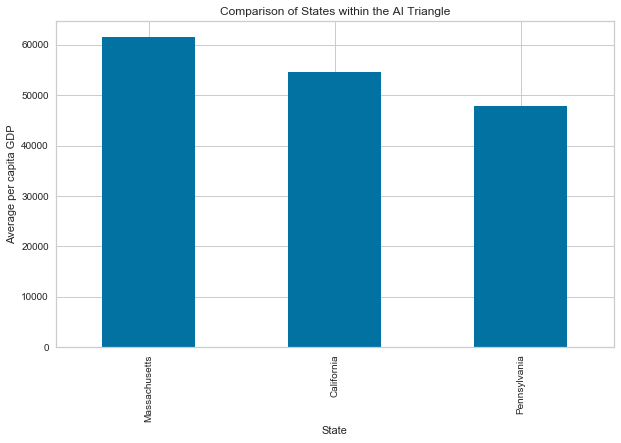

In [10]:
# now we can put the GDP_avg_df into a bar graph! :)

# plot the data in a bar graph without a legend.
GDP_avg_df = GDP_avg_df.set_index('State')
GDP_avg_df.plot(kind='bar', figsize=(10, 6), legend=False)

# add the axes labels and title
plt.xlabel('State')
plt.ylabel('Average per capita GDP')
plt.title('Comparison of States within the AI Triangle')

# show the bar graph
plt.show()

**_Figure 1. MA has the highest standard of living. In other words, MA has the highest level of wealth, comfort, material goods, and necessities available within that geographic region(definition by Investopedia.com). However, we now need to look at the cost of living in each city._**

# Step 2: Cost of Living Index for San Francisco, Boston, & Pittsburgh

##### Index definitions provided by Numbeo:
These indices are relative to New York City (NYC). Which means that for New York City, each index should be 100(%). If another city has, for example, rent index of 120, it means that on an average in that city rents are 20% more expensive than in New York City. If a city has rent index of 70, that means on an average in that city rents are 30% less expensive than in New York City.

***
Rent Index = an estimation of prices of renting apartments in the city compared to New York City. If Rent index is 80, Numbeo estimates that price of rents in that city is on an average 20% less than the price in New York.
***
Cost of Living Index (Excl. Rent) = a relative indicator of consumer goods prices, including groceries, restaurants, transportation and utilities. Cost of Living Index doesn't include accommodation expenses such as rent or mortgage. If a city has a Cost of Living Index of 120, it means Numbeo estimates it is 20% more expensive than New York (excluding rent).
***

Data was obtained through here: https://www.numbeo.com/cost-of-living/region_rankings.jsp?title=2019&region=019

**Let's visualize how far apart the cities are first.**

In [11]:
# coordinates found here: https://www.latlong.net/
# USA (lat, long) -> (37.090240, -95.712891)
# Pittsburgh, PA, USA (lat, long) -> (40.442169, -79.994957)
# San Francisco, CA, USA (lat, long) -> (37.774929, -122.419418)
# Boston, MA, USA (lat, long) -> (42.360081, -71.058884)

# generate map of USA
usa_map = folium.Map(
    location=[37.090240, -95.712891],
    zoom_start=4)

# next few steps are going to add red markers for Pittsburgh, Boston, & San Francisco.

# create feature groups
pittsburgh = folium.map.FeatureGroup()
boston = folium.map.FeatureGroup()
sanfran = folium.map.FeatureGroup()

# style the Pittsburgh feature group
pittsburgh.add_child(
    folium.features.CircleMarker(
    [40.442169, -79.994957], radius = 5,
    color = "red", fill_color = "Red"
    )
)

# style the Boston feature group
boston.add_child(
    folium.features.CircleMarker(
    [42.360081, -71.058884], radius = 5,
    color = "red", fill_color = "Red"
    )
)

# style the San Francisco feature group
sanfran.add_child(
    folium.features.CircleMarker(
    [37.774929, -122.419418], radius = 5,
    color = "red", fill_color = "Red"
    )
)

# add feature groups to the map
usa_map.add_child(pittsburgh)
usa_map.add_child(boston)
usa_map.add_child(sanfran)

# label the markers
folium.Marker([40.442169, -79.994957],
             popup='Pittsburgh').add_to(usa_map)

folium.Marker([42.360081, -71.058884],
             popup='Boston').add_to(usa_map)

folium.Marker([37.774929, -122.419418],
             popup='San Francisco').add_to(usa_map)

# display map
usa_map

In [12]:
# create a new dataframe called 'cost_living_df' and put it into a table 

data = [['San Francisco', 91.67, 106.05], ['Boston', 82.68, 72.59], ['Pittsburgh', 74.79, 36.44]]
cost_living_df = pd.DataFrame(data,columns=['State','Cost of Living Index', 'Rent Index'])
cost_living_df

,State,Cost of Living Index,Rent Index
0,San Francisco,91.67,106.05
1,Boston,82.68,72.59
2,Pittsburgh,74.79,36.44


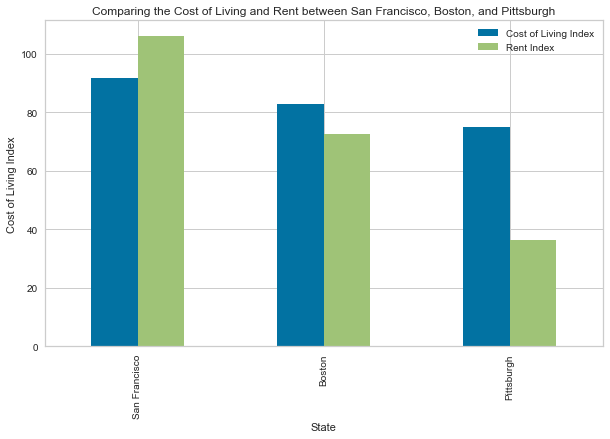

In [13]:
# let's visualize this :)

# plot the data in a bar graph WITH a legend.
cost_living_df = cost_living_df.set_index('State')
cost_living_df.plot(kind='bar', figsize=(10, 6))

# add the axes labels and title
plt.xlabel('State')
plt.ylabel('Cost of Living Index')
plt.title('Comparing the Cost of Living and Rent between San Francisco, Boston, and Pittsburgh')

# show the bar graph
plt.show()

**_Figure 2. Out of the AI Triangle, we can clearly see that Pittsburgh has the lowest cost of living index and lowest rent index._**

# Step 3: Find neighborhoods in Pittsburgh, PA with the highest amount of unique venues using Foursquare API.

**_Remember, we are doing this because networking is CRITICAL for business, especially for a startup company._**

In [14]:
# import neighboorhoods csv using pandas
neighborhoods_data = pd.read_csv('neighborhoods-pittsburgh.csv')
neighborhoods_data.head() # see how it looks

,Area,Neighborhood,Latitude,Longitude
0,Downtown,Central Business District,40.441111,-80.000000
1,Downtown,Strip District,40.450000,-79.985000
2,Downtown,Uptown,40.436000,-79.989000
3,North Side,Allegheny Center,40.453000,-80.005000
4,North Side,Allegheny West,40.452083,-80.015775


In [15]:
# let's take a look at what we have.
print('The file has {} areas and {} neighborhoods.'.format(
        len(neighborhoods_data['Area'].unique()),
        neighborhoods_data.shape[0]
    )
)

The file has 5 areas and 89 neighborhoods.


In [16]:
# using geopy library to get latitude and longitude of Pittsburgh, PA.
# I defined the user_agent as 'pitt_agent' 
address = 'Pittsburgh, PA'

geolocator = Nominatim(user_agent="pitt_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Pittsburgh are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Pittsburgh are 40.4416941, -79.9900861.


### Creating a map of Pittsburgh with the neighborhoods superimposed on top.

In [17]:
# create the map using lat and long values
map_pittsburgh = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(neighborhoods_data['Latitude'], neighborhoods_data['Longitude'], neighborhoods_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_pittsburgh)
    
map_pittsburgh

### Define Foursquare Credentials and Version

In [18]:
CLIENT_ID = 'PIPC51AIZR2LP3UQXQMHDZDNG2SA4FBFOPRPF34C1ACRX3TB' # my Foursquare ID
CLIENT_SECRET = 'M52ZRX43YYR2DSBL4W0USUYEH3NATSQ2UBVE0VBXP5URCZ2I' # my Foursquare Secret
VERSION = '20180604'
print('My credentials:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

My credentials:
CLIENT_ID: PIPC51AIZR2LP3UQXQMHDZDNG2SA4FBFOPRPF34C1ACRX3TB
CLIENT_SECRET:M52ZRX43YYR2DSBL4W0USUYEH3NATSQ2UBVE0VBXP5URCZ2I


In [19]:
# explore the first neighborhood in our dataframe

neighborhoods_data.loc[0, 'Neighborhood']

'Central Business District'

In [20]:
neighborhood_latitude = neighborhoods_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = neighborhoods_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = neighborhoods_data.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))


Latitude and longitude values of Central Business District are 40.441111, -80.0.


In [21]:
# limit the number of venues returned by foursquare API
LIMIT = 100

# define the radius
radius = 500

# create the URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID,
    CLIENT_SECRET,
    VERSION,
    neighborhood_latitude,
    neighborhood_longitude,
    radius,
    LIMIT)

# display the URL
url

'https://api.foursquare.com/v2/venues/explore?&client_id=PIPC51AIZR2LP3UQXQMHDZDNG2SA4FBFOPRPF34C1ACRX3TB&client_secret=M52ZRX43YYR2DSBL4W0USUYEH3NATSQ2UBVE0VBXP5URCZ2I&v=20180604&ll=40.441111,-80.0&radius=500&limit=100'

In [22]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5d2795c0db1d81002c512525'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'},
    {'name': '$-$$$$', 'key': 'price'}]},
  'headerLocation': 'Fifth and Forbes Corridor',
  'headerFullLocation': 'Fifth and Forbes Corridor, Pittsburgh',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 137,
  'suggestedBounds': {'ne': {'lat': 40.4456110045, 'lng': -79.99409832951984},
   'sw': {'lat': 40.4366109955, 'lng': -80.00590167048016}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '57a3b37e498ecaa9b8bca6dd',
       'name': 'The Milk Shake Factory',
       'location': {'address': '314 5th Ave',
        'crossStreet': 'at Wood St',
        'lat': 40.44054802996593,
 

In [23]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [24]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,The Milk Shake Factory,Ice Cream Shop,40.440548,-80.000185
1,Fairmont Pittsburgh Hotel,Hotel,40.441255,-80.001700
2,PNC YMCA,Gym,40.440841,-80.001440
3,Heinz Hall,Concert Hall,40.442800,-80.001475
4,Butcher and the Rye,American Restaurant,40.442484,-80.001915


In [25]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

100 venues were returned by Foursquare.


In [26]:
# now, we are going to explore all of the neighborhoods in Pittsburgh
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [27]:
pittsburgh_venues = getNearbyVenues(names=neighborhoods_data['Neighborhood'],
                                   latitudes=neighborhoods_data['Latitude'],
                                   longitudes=neighborhoods_data['Longitude']
                                  )

Central Business District
Strip District
Uptown
Allegheny Center
Allegheny West
Brighton Heights
California-Kirkbride
Central Northside
Chateau
East Allegheny
Fineview
Manchester
Marshall-Shadeland
North Shore
Northview Heights
Perry North
Perry South
Spring Garden
Spring Hill-City View
Summer Hill
Troy Hill
Allentown
Arlington
Arlington Heights
Beechview
Beltzhoover
Bon Air
Brookline
Carrick
Hays
Knoxville
Lincoln Place
Mount Oliver
Mount Washington
New Homestead
Overbrook
St. Clair
Southshore
South Side Flats
South Side Slopes
Banksville
Chartiers
Crafton Heights
Duquesne Heights
East Carnegie
Elliott
Esplen
Fairywood
Oakwood
Ridgemont
Sheraden
Westwood
Windgap
Bloomfield
Central Lawrenceville
Central Oakland
Crawford-Roberts
East Hills
East Liberty
Friendship
Garfield
Glen Hazel
Greenfield
Hazelwood
Highland Park
Homewood North
Homewood South
Homewood West
Larimer
Lincoln-Lemington-Belmar
Lower Lawrenceville
Middle Hill
Bedford Dwellings
Morningside
North Oakland
North Point Breeze


In [28]:
# check size of the new dataframe
print(pittsburgh_venues.shape)
pittsburgh_venues.head()

(1138, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Central Business District,40.441111,-80.0,The Milk Shake Factory,40.440548,-80.000185,Ice Cream Shop
1,Central Business District,40.441111,-80.0,Fairmont Pittsburgh Hotel,40.441255,-80.001700,Hotel
2,Central Business District,40.441111,-80.0,PNC YMCA,40.440841,-80.001440,Gym
3,Central Business District,40.441111,-80.0,Heinz Hall,40.442800,-80.001475,Concert Hall
4,Central Business District,40.441111,-80.0,Butcher and the Rye,40.442484,-80.001915,American Restaurant


In [29]:
# check how many venues were returned for EACH neighborhood 
pittsburgh_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Allegheny Center,29,29,29,29,29,29
Allegheny West,23,23,23,23,23,23
Allentown,7,7,7,7,7,7
Arlington,2,2,2,2,2,2
Arlington Heights,15,15,15,15,15,15
Banksville,4,4,4,4,4,4
Bedford Dwellings,8,8,8,8,8,8
Beechview,6,6,6,6,6,6
Beltzhoover,2,2,2,2,2,2


In [30]:
print('There are {} unique categories.'.format(len(pittsburgh_venues['Venue Category'].unique())))

There are 222 unique categories.


In [31]:
# one hot encoding
pittsburgh_onehot = pd.get_dummies(pittsburgh_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
pittsburgh_onehot['Neighborhood'] = pittsburgh_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [pittsburgh_onehot.columns[-1]] + list(pittsburgh_onehot.columns[:-1])
pittsburgh_onehot = pittsburgh_onehot[fixed_columns]

pittsburgh_onehot.head()

,Zoo,ATM,Adult Boutique,American Restaurant,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Bed & Breakfast,Beer Garden,Beer Store,Belgian Restaurant,Big Box Store,Bistro,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Burger Joint,Burrito Place,Bus Line,Bus Station,Business Service,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Check Cashing Service,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cuban Restaurant,Cycle Studio,Dance Studio,Deli / Bodega,Design Studio,Dessert Shop,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Exhibit,Fabric Shop,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Fish Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hawaiian Restaurant,Health & Beauty Service,Historic Site,History Museum,Hockey Arena,Home Service,Hookah Bar,Hot Dog Joint,Hotel,Hotel Bar,Hungarian Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Library,Light Rail Station,Liquor Store,Lounge,Market,Martial Arts Dojo,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Movie Theater,Moving Target,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Optical Shop,Other Repair Shop,Outdoor Sculpture,Park,Parking,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Piercing Parlor,Pizza Place,Planetarium,Playground,Plaza,Pool,Print Shop,Pub,Public Art,Radio Station,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Restaurant,River,Rock Club,Rugby Pitch,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shipping Store,Shopping Mall,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Spa,Sporting Goods Shop,Sports Bar,Steakhouse,Storage Facility,Supermarket,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tattoo Parlor,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park,Thrift / Vintage Store,Toy / Game Store,Trail,Tunnel,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Central Business District,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Central Business District,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [32]:
pittsburgh_grouped = pittsburgh_onehot.groupby('Neighborhood').mean().reset_index()
pittsburgh_grouped

,Neighborhood,Zoo,ATM,Adult Boutique,American Restaurant,Antique Shop,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,BBQ Joint,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Bed & Breakfast,Beer Garden,Beer Store,Belgian Restaurant,Big Box Store,Bistro,Boat or Ferry,Bookstore,Botanical Garden,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Burger Joint,Burrito Place,Bus Line,Bus Station,Business Service,Butcher,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Check Cashing Service,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cuban Restaurant,Cycle Studio,Dance Studio,Deli / Bodega,Design Studio,Dessert Shop,Diner,Discount Store,Dive Bar,Doctor's Office,Dog Run,Donut Shop,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Exhibit,Fabric Shop,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Fish Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Football Stadium,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Hawaiian Restaurant,Health & Beauty Service,Historic Site,History Museum,Hockey Arena,Home Service,Hookah Bar,Hot Dog Joint,Hotel,Hotel Bar,Hungarian Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Library,Light Rail Station,Liquor Store,Lounge,Market,Martial Arts Dojo,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Movie Theater,Moving Target,Museum,Music Venue,New American Restaurant,Nightclub,Noodle House,Optical Shop,Other Repair Shop,Outdoor Sculpture,Park,Parking,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Piercing Parlor,Pizza Place,Planetarium,Playground,Plaza,Pool,Print Shop,Pub,Public Art,Radio Station,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Restaurant,River,Rock Club,Rugby Pitch,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shipping Store,Shopping Mall,Skating Rink,Smoke Shop,Snack Place,Soccer Field,Spa,Sporting Goods Shop,Sports Bar,Steakhouse,Storage Facility,Supermarket,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tattoo Parlor,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Park,Thrift / Vintage Store,Toy / Game Store,Trail,Tunnel,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,Allegheny Center,0.034483,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.034483,0.000000,0.000000,0.034483,0.000000,0.000000,0.000000,0.000000,0.034483,0.000000,0.034483,0.000000,0.000000,0.000000,0.000000,0.000000,0.034483,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.034483,0.034483,0.000000,0.000,0.000000,0.000000,0.000000,0.034483,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.034483,0.000000,0.000000,0.034483,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.103448,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.034483,0.034483,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.034483,0.0

In [33]:
num_top_venues = 5

for hood in pittsburgh_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = pittsburgh_grouped[pittsburgh_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Allegheny Center----
           venue  freq
0  Deli / Bodega  0.10
1            Zoo  0.03
2    Event Space  0.03
3        Brewery  0.03
4   Burger Joint  0.03


----Allegheny West----
                  venue  freq
0                   Pub  0.09
1   American Restaurant  0.09
2        Sandwich Place  0.09
3  Fast Food Restaurant  0.09
4                 Diner  0.04


----Allentown----
                           venue  freq
0                  Deli / Bodega  0.14
1  Vegetarian / Vegan Restaurant  0.14
2           Caribbean Restaurant  0.14
3             Italian Restaurant  0.14
4                    Coffee Shop  0.14


----Arlington----
                       venue  freq
0             Cosmetics Shop   0.5
1        American Restaurant   0.5
2          Other Repair Shop   0.0
3         Mexican Restaurant   0.0
4  Middle Eastern Restaurant   0.0


----Arlington Heights----
               venue  freq
0     Discount Store  0.13
1  Convenience Store  0.13
2               Bank  0.07
3           

In [34]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [35]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = pittsburgh_grouped['Neighborhood']

for ind in np.arange(pittsburgh_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(pittsburgh_grouped.iloc[ind, :], num_top_venues)

print(neighborhoods_venues_sorted.shape)
neighborhoods_venues_sorted.head()

(86, 11)


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Allegheny Center,Deli / Bodega,Zoo,Belgian Restaurant,Sandwich Place,Burger Joint,Café,Coffee Shop,Comfort Food Restaurant,Performing Arts Venue,Park
1,Allegheny West,Sandwich Place,American Restaurant,Fast Food Restaurant,Pub,Zoo,Diner,Burger Joint,Exhibit,Café,Restaurant
2,Allentown,Chinese Restaurant,Italian Restaurant,Deli / Bodega,Vegetarian / Vegan Restaurant,Caribbean Restaurant,Coffee Shop,Discount Store,Yoga Studio,Ethiopian Restaurant,Event Space
3,Arlington,Cosmetics Shop,American Restaurant,Eastern European Restaurant,Flower Shop,Fish Market,Fish & Chips Shop,Field,Fast Food Restaurant,Farmers Market,Fabric Shop
4,Arlington Heights,Convenience Store,Discount Store,Intersection,Pharmacy,Café,Mobile Phone Shop,Fish & Chips Shop,Beer Store,Bar,Bank


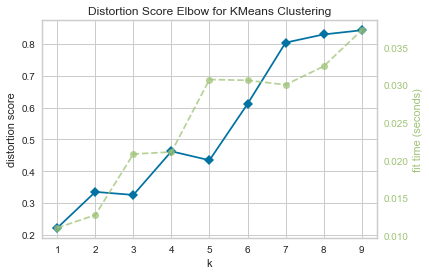

In [42]:
# set number of clusters
kclusters = 7

pittsburgh_grouped_clustering = pittsburgh_grouped.drop('Neighborhood', 1)


# find optimum k using elbow method
X = pittsburgh_grouped.drop('Neighborhood', 1)

# instantiate the model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))

visualizer.fit(X) # fit data to visualizer
visualizer.poof() # draw/show/poof the data

In [43]:
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(pittsburgh_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:11]

array([1, 1, 1, 5, 1, 0, 1, 0, 0, 1, 0], dtype=int32)

In [44]:
neighborhoods_venues_sorted.shape

(86, 11)

In [45]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

pittsburgh_merged = neighborhoods_data

# drop the NaN values and make sure you save changes by putting it back into dataframe
pittsburgh_merged = pittsburgh_merged.dropna()

# merging neighborhoods_data and neighborhoods_venues_sorted
pittsburgh_merged = pittsburgh_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

# fix NaN issue by drop or fill. drop was not working here.
pittsburgh_merged = pittsburgh_merged.fillna(0) 
pittsburgh_merged = pittsburgh_merged.astype({'Cluster Labels': int}) # convert cluster labels from float to int

pittsburgh_merged

,Area,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Downtown,Central Business District,40.441111,-80.000000,1,Coffee Shop,Hotel,Italian Restaurant,Mexican Restaurant,Restaurant,Plaza,Bar,Theater,Sandwich Place,American Restaurant
1,Downtown,Strip District,40.450000,-79.985000,1,Grocery Store,Bar,Bakery,Coffee Shop,Seafood Restaurant,Gourmet Shop,Art Gallery,Clothing Store,Diner,Nightclub
2,Downtown,Uptown,40.436000,-79.989000,1,Pizza Place,Bar,Lounge,Hockey Arena,Fast Food Restaurant,Snack Place,Outdoor Sculpture,Hotel,Bank,Coffee Shop
3,North Side,Allegheny Center,40.453000,-80.005000,1,Deli / Bodega,Zoo,Belgian Restaurant,Sandwich Place,Burger Joint,Café,Coffee Shop,Comfort Food Restaurant,Performing Arts Venue,Park
4,North Side,Allegheny West,40.452083,-80.015775,1,Sandwich Place,American Restaurant,Fast Food Restaurant,Pub,Zoo,Diner,Burger Joint,Exhibit,Café,Restaurant
5,North Side,Brighton Heights,40.484000,-80.037000,0,Market,Pharmacy,Seafood Restaurant,Park,Miscellaneous Shop,Yoga Studio,Donut Shop,Fast Food Restaurant,Farmers Market,Fabric Shop
6,North Side,California-Kirkbride,40.461000,-80.023000,2,Bakery,Yoga Studio,Food & Drink Shop,Flower Shop,Fish Market,Fish & Chips Shop,Field,Fast Food Restaurant,Farmers Market,Fabric Shop
7,North Side,Central Northside,40.456000,-80.010000,1,Park,Art Museum,Coffee Shop,Liquor Store,Discount Store,Zoo,Science Museum,Sculpture Garden,Exhibit,Café
8,North Side,Chateau,40.449300,-80.028300,0,Harbor / Marina,Scenic Lookout,Park,Yoga Studio,Dog Run,Field,Fast Food Restaurant,Farmers Market,Fabric Shop,Exhibit
9,North Side,East Allegheny,40.456000,-80.000000,1,Pizza Place,Deli / Bodega,Sandwich Place,Tea Room,Brewery,Restaurant,Event Space,Italian Restaurant,Chinese Restaurant,Coffee Shop


In [46]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(pittsburgh_merged['Latitude'], pittsburgh_merged['Longitude'], pittsburgh_merged['Neighborhood'], pittsburgh_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True, # change to True if you want the markers filled in
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [48]:
pittsburgh_merged.loc[pittsburgh_merged['Cluster Labels'] == 0, pittsburgh_merged.columns[[1] + list(range(5, pittsburgh_merged.shape[1]))]]


,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Brighton Heights,Market,Pharmacy,Seafood Restaurant,Park,Miscellaneous Shop,Yoga Studio,Donut Shop,Fast Food Restaurant,Farmers Market,Fabric Shop
8,Chateau,Harbor / Marina,Scenic Lookout,Park,Yoga Studio,Dog Run,Field,Fast Food Restaurant,Farmers Market,Fabric Shop,Exhibit
15,Perry North,Bakery,Soccer Field,Park,Baseball Field,Yoga Studio,Fish Market,Fish & Chips Shop,Field,Fast Food Restaurant,Farmers Market
24,Beechview,Light Rail Station,Playground,Mexican Restaurant,Park,Supermarket,Eastern European Restaurant,Fish & Chips Shop,Field,Fast Food Restaurant,Farmers Market
25,Beltzhoover,Tennis Court,Park,Yoga Studio,Fish & Chips Shop,Field,Fast Food Restaurant,Farmers Market,Fabric Shop,Exhibit,Event Space
26,Bon Air,Playground,Home Service,Baseball Field,Light Rail Station,Park,Tennis Court,Deli / Bodega,Design Studio,Fish Market,Fish & Chips Shop
27,Brookline,0,0,0,0,0,0,0,0,0,0
31,Lincoln Place,Pizza Place,Deli / Bodega,Coffee Shop,Dessert Shop,Park,Yoga Studio,Eastern European Restaurant,Fish & Chips Shop,Field,Fast Food Restaurant
34,New Homestead,0,0,0,0,0,0,0,0,0,0
36,St. Clair,0,0,0,0,0,0,0,0,0,0


In [49]:
pittsburgh_merged.loc[pittsburgh_merged['Cluster Labels'] == 1, pittsburgh_merged.columns[[1] + list(range(5, pittsburgh_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Central Business District,Coffee Shop,Hotel,Italian Restaurant,Mexican Restaurant,Restaurant,Plaza,Bar,Theater,Sandwich Place,American Restaurant
1,Strip District,Grocery Store,Bar,Bakery,Coffee Shop,Seafood Restaurant,Gourmet Shop,Art Gallery,Clothing Store,Diner,Nightclub
2,Uptown,Pizza Place,Bar,Lounge,Hockey Arena,Fast Food Restaurant,Snack Place,Outdoor Sculpture,Hotel,Bank,Coffee Shop
3,Allegheny Center,Deli / Bodega,Zoo,Belgian Restaurant,Sandwich Place,Burger Joint,Café,Coffee Shop,Comfort Food Restaurant,Performing Arts Venue,Park
4,Allegheny West,Sandwich Place,American Restaurant,Fast Food Restaurant,Pub,Zoo,Diner,Burger Joint,Exhibit,Café,Restaurant
7,Central Northside,Park,Art Museum,Coffee Shop,Liquor Store,Discount Store,Zoo,Science Museum,Sculpture Garden,Exhibit,Café
9,East Allegheny,Pizza Place,Deli / Bodega,Sandwich Place,Tea Room,Brewery,Restaurant,Event Space,Italian Restaurant,Chinese Restaurant,Coffee Shop
10,Fineview,American Restaurant,Golf Course,Moving Target,Theme Park,Baseball Field,Yoga Studio,Eastern European Restaurant,Fish & Chips Shop,Field,Fast Food Restaurant
11,Manchester,Historic Site,Pub,Storage Facility,Baseball Field,Eastern European Restaurant,Fish Market,Fish & Chips Shop,Field,Fast Food Restaurant,Farmers Market
12,Marshall-Shadeland,Health & Beauty Service,Grocery Store,Bar,Café,Eastern European Restaurant,Fish Market,Fish & Chips Shop,Field,Fast Food Restaurant,Farmers Market


In [50]:
pittsburgh_merged.loc[pittsburgh_merged['Cluster Labels'] == 2, pittsburgh_merged.columns[[1] + list(range(5, pittsburgh_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,California-Kirkbride,Bakery,Yoga Studio,Food & Drink Shop,Flower Shop,Fish Market,Fish & Chips Shop,Field,Fast Food Restaurant,Farmers Market,Fabric Shop


In [51]:
pittsburgh_merged.loc[pittsburgh_merged['Cluster Labels'] == 3, pittsburgh_merged.columns[[1] + list(range(5, pittsburgh_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
57,East Hills,Seafood Restaurant,Discount Store,Yoga Studio,Eastern European Restaurant,Fish Market,Fish & Chips Shop,Field,Fast Food Restaurant,Farmers Market,Fabric Shop
61,Glen Hazel,Gym / Fitness Center,Yoga Studio,Donut Shop,Fish Market,Fish & Chips Shop,Field,Fast Food Restaurant,Farmers Market,Fabric Shop,Exhibit
65,Homewood North,Gym / Fitness Center,Sports Bar,Discount Store,Food,Yoga Studio,Eastern European Restaurant,Fish Market,Fish & Chips Shop,Field,Fast Food Restaurant
66,Homewood South,Food,Café,Gym / Fitness Center,Bank,Yoga Studio,Fish Market,Fish & Chips Shop,Field,Fast Food Restaurant,Farmers Market


In [52]:
pittsburgh_merged.loc[pittsburgh_merged['Cluster Labels'] == 4, pittsburgh_merged.columns[[1] + list(range(5, pittsburgh_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
68,Larimer,Print Shop,Coffee Shop,Yoga Studio,Donut Shop,Fish Market,Fish & Chips Shop,Field,Fast Food Restaurant,Farmers Market,Fabric Shop


In [53]:
pittsburgh_merged.loc[pittsburgh_merged['Cluster Labels'] == 5, pittsburgh_merged.columns[[1] + list(range(5, pittsburgh_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
19,Summer Hill,American Restaurant,Yoga Studio,Eastern European Restaurant,Flower Shop,Fish Market,Fish & Chips Shop,Field,Fast Food Restaurant,Farmers Market,Fabric Shop
22,Arlington,Cosmetics Shop,American Restaurant,Eastern European Restaurant,Flower Shop,Fish Market,Fish & Chips Shop,Field,Fast Food Restaurant,Farmers Market,Fabric Shop


In [54]:
pittsburgh_merged.loc[pittsburgh_merged['Cluster Labels'] == 6, pittsburgh_merged.columns[[1] + list(range(5, pittsburgh_merged.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
83,Stanton Heights,Scenic Lookout,Restaurant,Yoga Studio,Donut Shop,Fish & Chips Shop,Field,Fast Food Restaurant,Farmers Market,Fabric Shop,Exhibit
